## Quantum State Evaluation and Time Evolution

We prepare and compare state evolution at each step; generate the unitary and try to visualize the operations on a bloch sphere.

In [9]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, IBMQ, transpile, execute
from qiskit.visualization import plot_state_hinton, plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_state_qsphere
from qiskit.providers.ibmq import least_busy

import numpy as np

%config InlineBackend.figure_format = 'svg' # Makes the images look nice
%matplotlib inline

In [10]:
qc1 = QuantumCircuit(1)

In [11]:
# Define initial_state
#initial_state = [1/np.sqrt(2), complex(0,1/np.sqrt(2))]  # Define the initial state vector as: [0.70710678+0.j   0 +0.70710678j]
#initial_state = [0,1]   # Define initial_state as |1>
#qc1.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
#state = execute(qc1,backend).result().get_statevector() # Execute the circuit
#print(state)

In [12]:
qc1.u1(np.pi/4, 0) #introduces global phase Rz(phi); state is unaffected.
qc1.draw()

┌──────────┐
q_0: ┤ U1(pi/4) ├
     └──────────┘

[1.+0.j 0.+0.j]


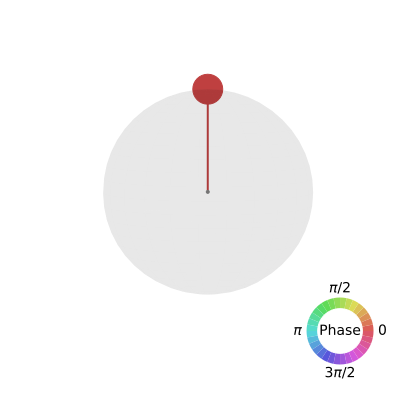

In [13]:
backend = Aer.get_backend('statevector_simulator') #Choose Simulator
result = execute(qc1,backend).result() # Run simulation and get result
out_state = result.get_statevector()
print(out_state) # Display the output state vector
plot_state_qsphere(out_state)

In [18]:
qc = QuantumCircuit(2)
phi_val = 0.922438

qc.h(0)
qc.h(1)
qc.x(1)
qc.cx(1,0)
qc.x(1)
qc.x(1)
qc.cu1(phi_val, 1, 0)
qc.x(1)
qc.x(1)
qc.cx(1,0)
qc.x(1)
qc.draw()

┌───┐     ┌───┐                              ┌───┐     
q_0: ┤ H ├─────┤ X ├───────────■──────────────────┤ X ├─────
     ├───┤┌───┐└─┬─┘┌───┐┌───┐ │0.92244 ┌───┐┌───┐└─┬─┘┌───┐
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ X ├─■────────┤ X ├┤ X ├──■──┤ X ├
     └───┘└───┘     └───┘└───┘          └───┘└───┘     └───┘

In [19]:
backend = Aer.get_backend('statevector_simulator') #Choose Simulator
result = execute(qc,backend).result() # Run simulation and get result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.30193934+0.39853812j 0.5       +0.j         0.5       +0.j
 0.5       +0.j        ]


# 2-qubit implementation of Grover-Long Algorithm

In [22]:
qc = QuantumCircuit(2)
#phi_val = 0.922438 #for 1 solution
#j=3 #for 1 solution

phi_val = 0.9045568943 #for 2 solution
j=2 #for 2 solution

#Oracle W
qc.h(0)
qc.h(1)
qc.mcx([1],0)
qc.barrier()

for n in range(j):

    #---- Oracle O ----
    #mark 0
    qc.x(1)
    qc.cx(1,0)
    qc.x(1)
    qc.x(1)
    qc.cu1(phi_val,1,0)
    qc.x(1)
    qc.x(1)
    qc.cx(1,0)
    qc.x(1)
    
    #mark 1
    qc.x(1)
    qc.cu1(phi_val,1,0)
    qc.x(1)
    
    #mark 2
    #qc.cnot(1,0)
    #qc.cu1(phi_val,1,0)
    #qc.cnot(1,0)
    
    #mark 3
    #qc.cu1(phi_val,1,0)
    #qc.barrier()

    #---- Oracle W inverse ----
    qc.h(0)
    qc.h(1)
    qc.barrier()

    #---- Oracle I ----
    qc.x(1)
    qc.cx(1,0)
    qc.x(1)
    qc.x(1)
    qc.cu1(phi_val, 1, 0)
    qc.x(1)
    qc.x(1)
    qc.cx(1,0)
    qc.x(1)
    #qc.draw()
    qc.barrier()
    
    #---- Oracle W ----
    qc.h(0)
    qc.h(1)
    qc.barrier()

#qc.measure_all()
qc.draw()

┌───┐┌───┐ ░      ┌───┐                              ┌───┐          »
q_0: ┤ H ├┤ X ├─░──────┤ X ├───────────■──────────────────┤ X ├──────────»
     ├───┤└─┬─┘ ░ ┌───┐└─┬─┘┌───┐┌───┐ │0.90456 ┌───┐┌───┐└─┬─┘┌───┐┌───┐»
q_1: ┤ H ├──■───░─┤ X ├──■──┤ X ├┤ X ├─■────────┤ X ├┤ X ├──■──┤ X ├┤ X ├»
     └───┘      ░ └───┘     └───┘└───┘          └───┘└───┘     └───┘└───┘»
«               ┌───┐      ░      ┌───┐                              ┌───┐     »
«q_0: ─■────────┤ H ├──────░──────┤ X ├───────────■──────────────────┤ X ├─────»
«      │0.90456 ├───┤┌───┐ ░ ┌───┐└─┬─┘┌───┐┌───┐ │0.90456 ┌───┐┌───┐└─┬─┘┌───┐»
«q_1: ─■────────┤ X ├┤ H ├─░─┤ X ├──■──┤ X ├┤ X ├─■────────┤ X ├┤ X ├──■──┤ X ├»
«               └───┘└───┘ ░ └───┘     └───┘└───┘          └───┘└───┘     └───┘»
«      ░ ┌───┐ ░      ┌───┐                              ┌───┐          »
«q_0: ─░─┤ H ├─░──────┤ X ├───────────■──────────────────┤ X ├──────────»
«      ░ ├───┤ ░ ┌───┐└─┬─┘┌───┐┌───┐ │0.90456 ┌───┐┌───┐└─┬─┘┌───┐┌───┐»
«q_1: ─░─┤ H ├─░─┤ X ├──■──┤ X ├┤ X ├─■────────┤ X ├┤ X ├──■──┤ X ├┤ X ├»
«      ░ └───┘ ░ └───┘     └───┘└───┘          └───┘└───┘     └───┘└───┘»
«               ┌───┐      ░      ┌───┐                              ┌───┐     »
«q_0: ─■────────┤ H ├──────░──────┤ X ├───────────■──────────────────┤ X ├─────»
«      │0.90456 ├───┤┌───┐ ░ ┌───┐└─┬─┘┌───┐┌───┐ │0.90456 ┌───┐┌───┐└─┬─┘┌───┐»
«q_1: ─■────────┤ X ├┤ H ├─░─┤ X ├──■──┤ X ├┤ X ├─■────────┤ X ├┤ X ├──■──┤ X ├»
«               └───┘└───┘ ░ └───┘     └───┘└───┘          └───┘└───┘     └───┘»
«      ░ ┌───┐ ░ 
«q_0: ─░─┤ H ├─░─
«      ░ ├───┤ ░ 
«q_1: ─░─┤ H ├─░─
«      ░ └───┘ ░

In [521]:
#backend = Aer.get_backend('statevector_simulator') #Choose Simulator
#result = execute(qc,backend).result() # Run simulation and get result
#out_state = result.get_statevector()
#print(out_state) # Display the output state vector

{'00': 0.5000000000000002, '01': 0.49999999999999994}


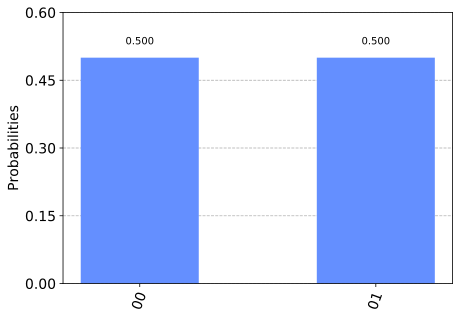

In [522]:
#When running on an actual quantum computer and get the measurement results instead of state_vector
result = execute(qc, backend).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

#For running on the real quantum device. The first 3 lines do not need to be uncommented. 
#Running them only saves the token locally. Instead simply use the following 3 lines after them.
#token = 'b29bc3ae17e2ed86d75a235eb5a0fb432192796adb39b37cf91614df48b432d1cdaac481103cdf8cc4b4587d4ffee85bc4d5a899a4311fd4a6981e70cdc6d629'
#qiskit.IBMQ.save_account(token)    
#provider = qiskit.IBMQ.load_account()
#device = provider.get_backend('ibmq_16_melbourne')
#job = execute( qc, device, shots=8192 )
#counts = result.get_counts()
#print(counts)
#plot_histogram(counts)